<a href="https://colab.research.google.com/github/YasirKhan1811/Artificial_Intelligence/blob/main/clustering_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [3]:
# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clustering_penguins/penguins.csv")

In [4]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
penguins_df.shape

(344, 5)

In [7]:
# Step 2 - Dealing with null values and outliers
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [8]:
penguins_df.dropna(inplace=True)
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
penguins_df.shape

(335, 5)

In [10]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


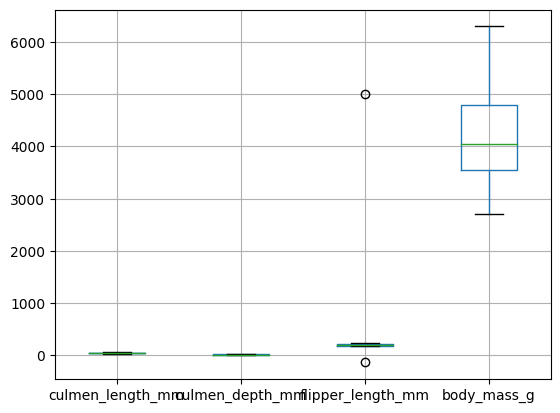

In [11]:
penguins_df.boxplot()
plt.show()

In [20]:
penguins = penguins_df[(penguins_df['flipper_length_mm'] > penguins_df['flipper_length_mm'].min()) &
                       (penguins_df['flipper_length_mm'] < penguins_df['flipper_length_mm'].max())]

In [21]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [22]:
# to show the unique values of sex column
penguins['sex'].value_counts()

MALE      167
FEMALE    165
.           1
Name: sex, dtype: int64

In [25]:
# this code removes the row from the dataframe, where sex is written as '.'
penguins_clean = penguins[penguins['sex'] != '.']
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


In [28]:
# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean, drop_first=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


Standardization is typically applied to numerical features to ensure that they have zero mean and unit variance.

If you have a column representing 'sex' with values 0 and 1, it's not necessary to standardize this column because it's already in a scale (0 and 1) that is meaningful. StandardScaler is mainly applied to continuous numerical features.

In [42]:
# Step 4 - Perform preprocessing steps on the dataset - scaling

numeric_columns = df.columns[df.dtypes == 'float64']

# here, I build a pipeline that connects the two data transformation steps (OneHotEncoder and StandardScaler)
column_trans = make_column_transformer((StandardScaler(), numeric_columns), remainder='passthrough')

# fit the data, transform, and reveal a df object
penguins_preprocessed = pd.DataFrame(column_trans.fit_transform(df), columns=df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,1.0
1,-0.830434,0.126187,-1.068577,-0.504847,0.0
2,-0.683490,0.432728,-0.426399,-1.187953,0.0
3,-1.344738,1.096901,-0.569105,-0.939551,0.0
4,-0.867170,1.761074,-0.783164,-0.691149,1.0


In [44]:
# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca

PCA()

In [59]:
n_components = sum(dfx_pca.explained_variance_ratio_>0.1)

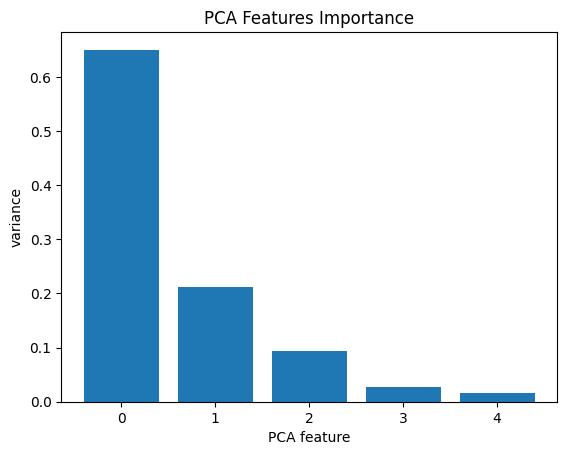

In [60]:
x = range(dfx_pca.n_components_)
y = dfx_pca.explained_variance_ratio_
plt.bar(x, y)
plt.xticks(x)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.title('PCA Features Importance')
plt.show()

In [61]:
# setting n_components = 2
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

In [63]:
# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

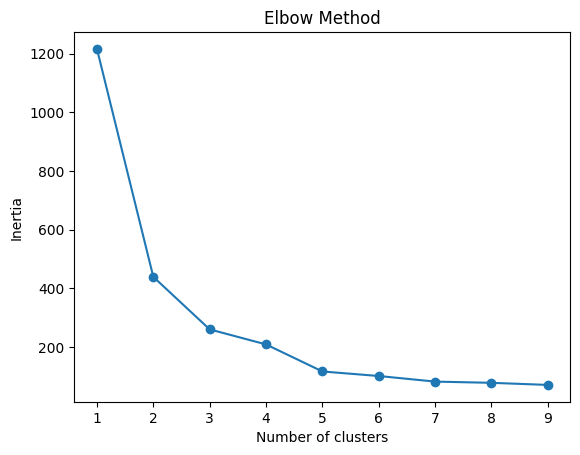

In [64]:
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

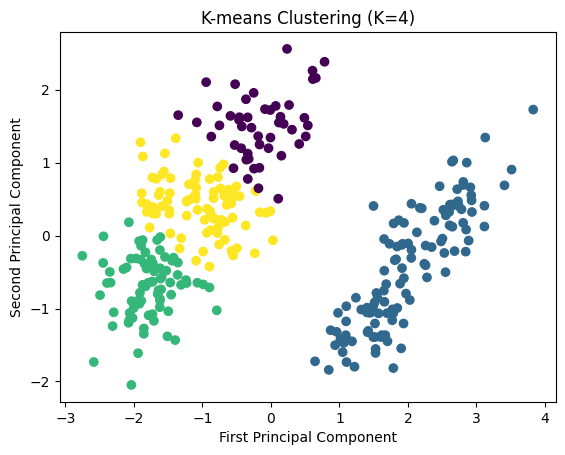

In [68]:
# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters
# and visualize the resulting clusters.

# from the above elbow method, we see that n_clusters will be 4, corresponding to 4 species of antarctic penguins
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [76]:
# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = list(kmeans.labels_)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

<ipython-input-76-4feb66a1afa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['label'] = list(kmeans.labels_)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,49.500000,19.368750,198.958333
1,47.568067,14.996639,217.235294
2,37.508861,17.540506,187.405063
3,42.037209,18.544186,192.069767
